In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Mispriced-Diamonds.csv')
data.head()

,carat,clarity,price
0,0.23,SI2,326
1,0.21,SI1,326
2,0.23,VS1,327
3,0.29,VS2,334
4,0.31,SI2,335


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 3 columns):
carat      53940 non-null float64
clarity    53940 non-null object
price      53940 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.0+ MB


![title](diamond-clarity-scale.png)

In [4]:
data = data[data['carat']<2.5]
IF_data=data[data['clarity']=='IF'].drop('clarity',axis=1)
VVS1_data=data[data['clarity']=='VVS1'].drop('clarity',axis=1)
VVS2_data=data[data['clarity']=='VVS2'].drop('clarity',axis=1)
VS1_data=data[data['clarity']=='VS1'].drop('clarity',axis=1)
VS2_data=data[data['clarity']=='VS2'].drop('clarity',axis=1)
SI1_data=data[data['clarity']=='SI1'].drop('clarity',axis=1)
SI2_data=data[data['clarity']=='SI2'].drop('clarity',axis=1)
I1_data=data[data['clarity']=='I1'].drop('clarity',axis=1)


IF_data.head()

,carat,price
229,0.52,2783
250,0.55,2789
256,0.64,2790
281,0.72,2795
304,0.60,2800


In [5]:
IF_carat = IF_data.groupby('carat', as_index = False).mean()
VVS1_carat = VVS1_data.groupby('carat', as_index = False).mean()
VVS2_carat = VVS2_data.groupby('carat', as_index = False).mean()
VS1_carat = VS1_data.groupby('carat', as_index = False).mean()
VS2_carat = VS2_data.groupby('carat', as_index = False).mean()
SI1_carat = SI1_data.groupby('carat', as_index = False).mean()
SI2_carat = SI2_data.groupby('carat', as_index = False).mean()
I1_carat = I1_data.groupby('carat', as_index = False).mean()

IF_carat.head()

,carat,price
0,0.23,497.714286
1,0.24,566.500000
2,0.25,599.833333
3,0.26,612.769231
4,0.27,685.117647


c:\python3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
c:\python3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
c:\python3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding

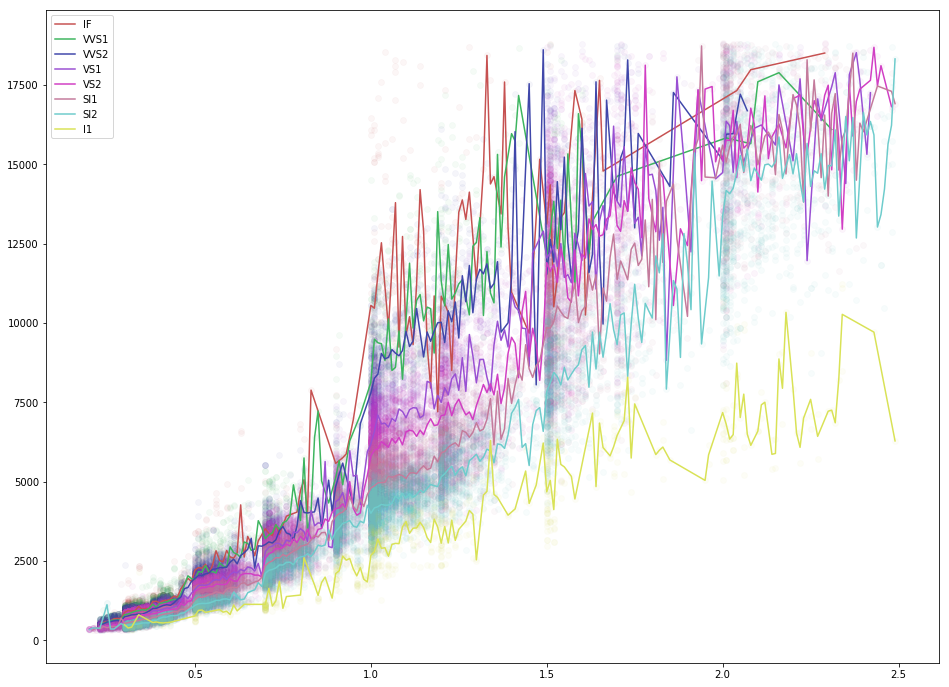

In [6]:
#Crear figura y subgraficas
plt.figure(1, figsize=(16, 12))
IF = plt.subplot()
VVS1 = plt.subplot()
VVS2 = plt.subplot()
VS1 = plt.subplot()
VS2 = plt.subplot()
SI1 = plt.subplot()
SI2 = plt.subplot()
I1 = plt.subplot()

IF_line = plt.subplot()
VVS1_line = plt.subplot()
VVS2_line = plt.subplot()
VS1_line = plt.subplot()
VS2_line = plt.subplot()
SI1_line = plt.subplot()
SI2_line = plt.subplot()
I1_line = plt.subplot()
#plt.xaxis()

#Crear graficas scatter
IF.scatter(IF_data['carat'], IF_data['price'], linewidth =0.5, alpha = 0.05, color="#c65151", label = None)
VVS1.scatter(VVS1_data['carat'], VVS1_data['price'], linewidth =0.5, alpha = 0.05, color="#3db55f", label = None)
VVS2.scatter(VVS2_data['carat'], VVS2_data['price'], linewidth =0.5, alpha = 0.05, color="#4047aa", label = None)
VS1.scatter(VS1_data['carat'], VS1_data['price'], linewidth =0.5, alpha = 0.05, color="#9a50d3", label = None)
VS2.scatter(VS2_data['carat'], VS2_data['price'], linewidth =0.5, alpha = 0.05, color="#d13ec4", label = None)
SI1.scatter(SI1_data['carat'], SI1_data['price'], linewidth =0.5, alpha = 0.05, color="#c47b9c", label = None)
SI2.scatter(SI2_data['carat'], SI2_data['price'], linewidth =0.5, alpha = 0.05, color="#6ecccc", label = None)
I1.scatter(I1_data['carat'], I1_data['price'], linewidth =0.5, alpha = 0.05, color="#d9e256", label = None)

#Crear graficas de linea
IF_line.plot(IF_carat['carat'], IF_carat['price'], color="#c65151", label = "IF")
VVS1_line.plot(VVS1_carat['carat'], VVS1_carat['price'], color="#3db55f", label = "VVS1")
VVS2_line.plot(VVS2_carat['carat'], VVS2_carat['price'], color="#4047aa", label = "VVS2")
VS1_line.plot(VS1_carat['carat'], VS1_carat['price'], color="#9a50d3", label = "VS1")
VS2_line.plot(VS2_carat['carat'], VS2_carat['price'], color="#d13ec4", label = "VS2")
SI1_line.plot(SI1_carat['carat'], SI1_carat['price'], color="#c47b9c", label = "SI1")
SI2_line.plot(SI2_carat['carat'], SI2_carat['price'], color="#6ecccc", label = "SI2")
I1_line.plot(I1_carat['carat'], I1_carat['price'], color="#d9e256", label = "I1")

plt.legend()

Para poder asignar un valor numérico a las claridades, tomamos el promedio de la division del precio entre el kilataje, lo cual nos da un valor de que tanto afecta realmente usar una clariadad u otra.

In [7]:
IF_value = (IF_carat['price']/IF_carat['carat']).mean()
VVS1_value = (VVS1_carat['price']/VVS1_carat['carat']).mean()
VVS2_value = (VVS2_carat['price']/VVS2_carat['carat']).mean()
VS1_value = (VS1_carat['price']/VS1_carat['carat']).mean()
VS2_value = (VS2_carat['price']/VS2_carat['carat']).mean()
SI1_value = (SI1_carat['price']/SI1_carat['carat']).mean()
SI2_value = (SI2_carat['price']/SI2_carat['carat']).mean()
I1_value = (I1_carat['price']/I1_carat['carat']).mean()

clarity_values = {'IF': IF_value,
                 'VVS1': VVS1_value, 
                 'VVS2': VVS2_value,
                 'VS1': VS1_value, 
                 'VS2': VS2_value, 
                 'SI1': SI1_value, 
                 'SI2': SI2_value, 
                 'I1': I1_value}

print('IF = ' + str(IF_value))
print('VVS1 = ' + str(VVS1_value))
print('VVS2 = ' + str(VVS2_value))
print('VS1 = ' + str(VS1_value))
print('VS2 = ' + str(VS2_value))
print('SI1 = ' + str(SI1_value))
print('SI2 = ' + str(SI2_value))
print('I1 = ' + str(I1_value))

IF = 6716.646656071293
VVS1 = 6404.914251020539
VVS2 = 6245.705765815477
VS1 = 5737.03126943608
VS2 = 5520.403644812313
SI1 = 5100.82593042837
SI2 = 4538.984947735884
I1 = 2832.260924281442


Creamos un DataFrame de los promedios por kilataje de cada claridad

In [8]:
carat_DFs = [IF_carat, VVS1_carat, VVS2_carat, VS1_carat, VS2_carat, SI1_carat, SI2_carat, I1_carat]
carats_means = pd.concat(carat_DFs, keys=['IF','VVS1', 'VVS2','VS1', 'VS2', 'SI1', 'SI2', 'I1'],names=['clarity'])

carats_means = carats_means.reset_index().drop('level_1',axis=1)
print(carats_means.head())
print('\n')
print(carats_means.tail())

  clarity  carat       price
0      IF   0.23  497.714286
1      IF   0.24  566.500000
2      IF   0.25  599.833333
3      IF   0.26  612.769231
4      IF   0.27  685.117647


     clarity  carat    price
1364      I1   2.32   6860.0
1365      I1   2.33   8220.0
1366      I1   2.34  10277.0
1367      I1   2.43   9716.0
1368      I1   2.49   6289.0


### Mejores opciones de compra venta
La funcion *get_best_diamonds(min, max)* simula a uin cliente que da un rengo de presupuesto para comprar un diamante, proseguimos filtrando todos los datos dentro de este rango, le agregamos a cada fila el valor promedio de la claridad, el valor de la claridad en esa fila y un porcentaje de cambio en el mismo, con estos datos revismos cual es el que da mejor relacion calidad precio y que tanto se alejan del promedio para revisar el verdadero valor de la oferta.


In [9]:
def get_best_diamonds(min,max):
    posible_buyings = carats_means[np.logical_and(carats_means['price']>min,carats_means['price']<max)].reset_index(drop=True)
    posible_buyings['clarity_value'] = posible_buyings.apply(lambda row: clarity_values[row['clarity']], axis = 1)
    posible_buyings['real_value'] = posible_buyings.apply(lambda row: row['price']/row['carat'], axis=1)
    posible_buyings['change%'] = posible_buyings.apply(lambda row: (row['real_value']-row['clarity_value'])/row['clarity_value']*100, axis=1)

    best_of_all = posible_buyings[posible_buyings['change%'] == posible_buyings['change%'].max()]

    posible_IF = posible_buyings['clarity'] == 'IF'
    posible_VVS1 = posible_buyings['clarity'] == 'VVS1'
    posible_VVS2 = posible_buyings['clarity'] == 'VVS2'
    posible_VS1 = posible_buyings['clarity'] == 'VS1'
    posible_VS2 = posible_buyings['clarity'] == 'VS2'
    posible_SI1 = posible_buyings['clarity'] == 'SI1'
    posible_SI2 = posible_buyings['clarity'] == 'SI2'
    posible_I1 = posible_buyings['clarity'] == 'I1'

    best_IF = posible_buyings[posible_IF][posible_buyings[posible_IF]['change%'] == posible_buyings[posible_IF]['change%'].max()]
    best_VVS1 = posible_buyings[posible_VVS1][posible_buyings[posible_VVS1]['change%'] == posible_buyings[posible_VVS1]['change%'].max()]
    best_VVS2 = posible_buyings[posible_VVS2][posible_buyings[posible_VVS2]['change%'] == posible_buyings[posible_VVS2]['change%'].max()]
    best_VS1 = posible_buyings[posible_VS1][posible_buyings[posible_VS1]['change%'] == posible_buyings[posible_VS1]['change%'].max()]
    best_VS2 = posible_buyings[posible_VS2][posible_buyings[posible_VS2]['change%'] == posible_buyings[posible_VS2]['change%'].max()]
    best_SI1 = posible_buyings[posible_SI1][posible_buyings[posible_SI1]['change%'] == posible_buyings[posible_SI1]['change%'].max()]
    best_SI2 = posible_buyings[posible_SI2][posible_buyings[posible_SI2]['change%'] == posible_buyings[posible_SI2]['change%'].max()]
    best_I1 = posible_buyings[posible_I1][posible_buyings[posible_I1]['change%'] == posible_buyings[posible_I1]['change%'].max()]




    best_results = pd.concat([best_IF, best_VVS1, best_VVS2, best_VS1, best_VS2, best_SI1, best_SI2, best_I1,best_of_all], ignore_index=True)
    print("El mejor valor/precio es \n{}".format(best_results.loc[best_results['change%'].idxmax()]))
    print()
    print("El mejor valor real es \n{}".format(best_results.loc[best_results['real_value'].idxmax()]))
    return best_results

In [10]:
get_best_diamonds(2500,5000)

El mejor valor/precio es 
clarity               I1
carat               1.33
price               4698
clarity_value    2832.26
real_value       3532.33
change%          24.7177
Name: 7, dtype: object

El mejor valor real es 
clarity                IF
carat                0.63
price             4272.88
clarity_value     6716.65
real_value        6782.34
change%          0.978086
Name: 0, dtype: object


,clarity,carat,price,clarity_value,real_value,change%
0,IF,0.63,4272.875000,6716.646656,6782.341270,0.978086
1,VVS1,0.78,4904.000000,6404.914251,6287.179487,-1.838194
2,VVS2,0.80,4404.416667,6245.705766,5505.520833,-11.851102
3,VS1,0.92,4661.826087,5737.031269,5067.202268,-11.675533
4,VS2,0.98,4724.500000,5520.403645,4820.918367,-12.670908
5,SI1,1.02,4969.855319,5100.825930,4872.407176,-4.478074
6,SI2,0.99,4260.500000,4538.984948,4303.535354,-5.187274
7,I1,1.33,4698.000000,2832.260924,3532.330827,24.717705
8,I1,1.33,4698.000000,2832.260924,3532.330827,24.717705


## Regresion Lineal

Aqui creamos la funcion ols la cual recibe datos con los cuales hara una regresion lineal simple, basada en el metodo "ordinary least squares", lo probamos en cada set de datos de cada tipo de claridad y asi creamos un predictor por claridad

![title](multi-regression-equation.png)

In [11]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [12]:
def ols(data):
    X=data['carat'].values.reshape(-1,1)
    y=data['price'].values.reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 0)
    model = LinearRegression()
    model.fit(X_train.reshape(-1, 1), y_train)
    plt.scatter(X_train, y_train, color='red', label="Train Data")
    plt.scatter(X_test, y_test, color='green', label="Test Data")
    plt.plot(X_train, model.predict(X_train), label="Regression")
    plt.legend()
    plt.show 
    print("Score: "+ str(model.score(X_test,y_test)))
    return model

def pricePrediction(ols, carat):
    print("Prediccion: " + str(ols.predict(carat)[0][0]))

Score: 0.8444337142591564
Prediccion: 8631.627915196766


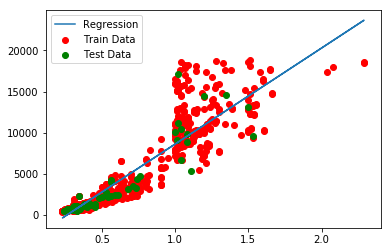

In [13]:
model = ols(IF_data)
pricePrediction(model, 1)

Score: 0.87579336238925
Prediccion: 7696.940831785672


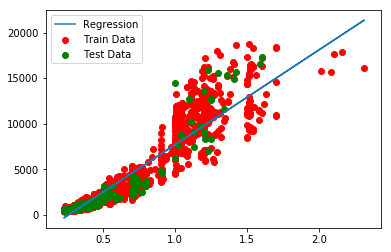

In [14]:
model = ols(VVS1_data)
pricePrediction(model, 1)

Score: 0.9046889941360011
Prediccion: 7347.710700798183


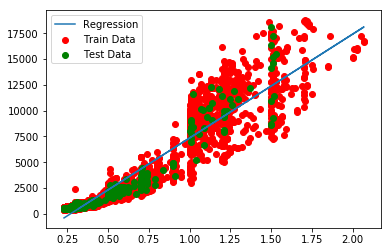

In [15]:
model = ols(VVS2_data)
pricePrediction(model, 1)

Score: 0.8910951718887378
Prediccion: 6292.549606048343


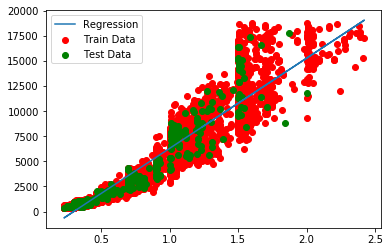

In [16]:
model = ols(VS1_data)
pricePrediction(model, 1)

Score: 0.9175006767797904
Prediccion: 5962.632508993202


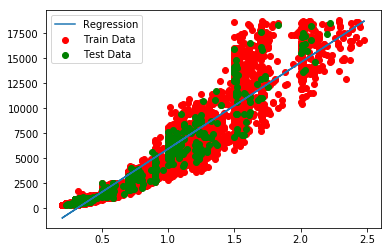

In [17]:
model = ols(VS2_data)
pricePrediction(model, 1)

Score: 0.9228295635418049
Prediccion: 5203.614493697321


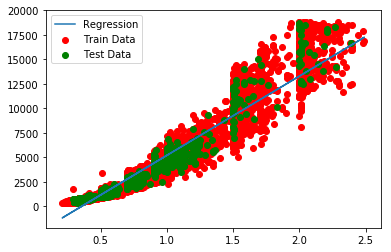

In [18]:
model = ols(SI1_data)
pricePrediction(model, 1)

Score: 0.9164471583275241
Prediccion: 4456.799446456718


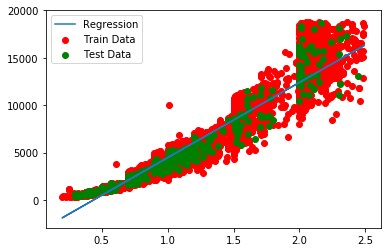

In [19]:
model = ols(SI2_data)
pricePrediction(model, 1)

Score: 0.8428635444473479
Prediccion: 2733.1557843407


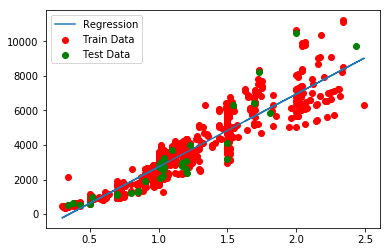

In [20]:
model = ols(I1_data)
pricePrediction(model, 1)

# Cambio a dataset completo
Empezaremos a usar el dataset que incluye más datos
Importamos datos y vemos la caracteristicas

### Analisis inicial de datos

In [21]:
dataComplete = pd.read_csv('diamonds_more.csv')
dataComplete = dataComplete.drop(dataComplete.columns[0], axis=1)
dataComplete.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [22]:
dataComplete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.5+ MB


In [23]:
dataComplete.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Limpieza básica de datos
Limpieza de los datos nulos, y de los datos no utiles para el analisis

In [24]:
len(dataComplete[(dataComplete['x']<=0) | (dataComplete['y']<=0) | (dataComplete['z']<=0) ])

20

In [25]:
dataComplete.loc[(dataComplete['x']<=0) | (dataComplete['y']<=0) | (dataComplete['z']<=0) ]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [26]:
dataComplete = dataComplete.drop(dataComplete.loc[dataComplete['x']<=0].index)
dataComplete = dataComplete.drop(dataComplete.loc[dataComplete['y']<=0].index)
dataComplete = dataComplete.drop(dataComplete.loc[dataComplete['z']<=0].index)
dataComplete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
carat      53920 non-null float64
cut        53920 non-null object
color      53920 non-null object
clarity    53920 non-null object
depth      53920 non-null float64
table      53920 non-null float64
price      53920 non-null int64
x          53920 non-null float64
y          53920 non-null float64
z          53920 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.9+ MB


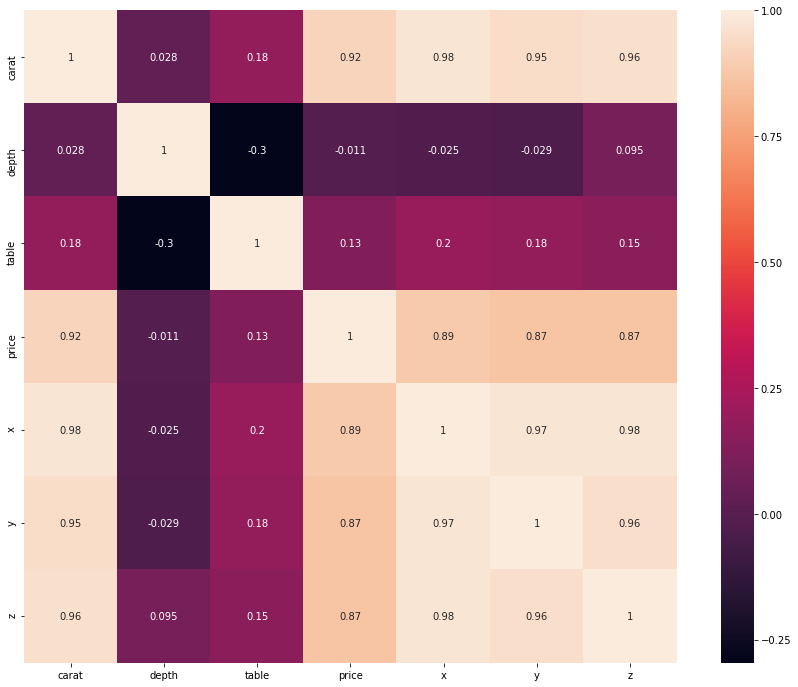

In [27]:
plt.figure(figsize=(16, 12))
corrmat = dataComplete.corr()
sns.heatmap(data=corrmat, square=True , annot=True, cbar=True)

In [28]:
dataComplete = dataComplete.drop(['table','depth'], axis=1)
dataComplete.head()

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75


In [29]:
#dataComplete['volume'] = dataComplete['x']*dataComplete['y']*dataComplete['z']
#dataComplete = dataComplete.drop(['x','y','z'], axis=1)
dataComplete.head()

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75


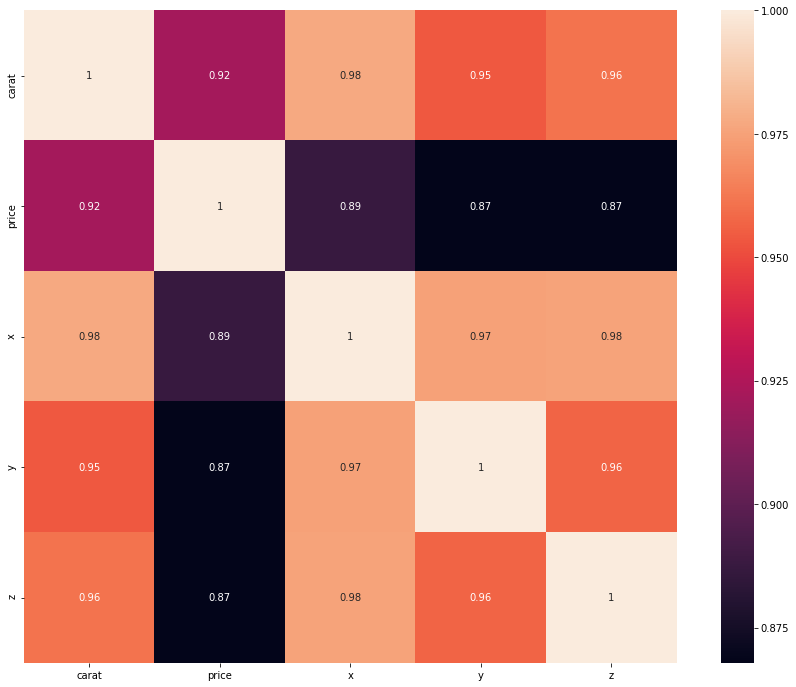

In [30]:
plt.figure(figsize=(16, 12))
corrmat = dataComplete.corr()
sns.heatmap(data=corrmat, square=True , annot=True, cbar=True)

### Variables Dummy
Ahora cambiaremos las variables categoricas a variables dummy para su análisis.

In [31]:
cut_dummies = pd.get_dummies(dataComplete['cut'])
cut_dummies.head()

,Fair,Good,Ideal,Premium,Very Good
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0


In [32]:
#Avoid dummy trap
cut_dummies = cut_dummies.iloc[:,1:]
cut_dummies.head()

,Good,Ideal,Premium,Very Good
0,0,1,0,0
1,0,0,1,0
2,1,0,0,0
3,0,0,1,0
4,1,0,0,0


In [33]:
dataComplete = pd.concat([dataComplete,cut_dummies], axis=1)
dataComplete = dataComplete.drop(['cut'], axis=1)
dataComplete.head()

,carat,color,clarity,price,x,y,z,Good,Ideal,Premium,Very Good
0,0.23,E,SI2,326,3.95,3.98,2.43,0,1,0,0
1,0.21,E,SI1,326,3.89,3.84,2.31,0,0,1,0
2,0.23,E,VS1,327,4.05,4.07,2.31,1,0,0,0
3,0.29,I,VS2,334,4.20,4.23,2.63,0,0,1,0
4,0.31,J,SI2,335,4.34,4.35,2.75,1,0,0,0


In [34]:
clarity_dummies = pd.get_dummies(dataComplete['clarity'])
print(clarity_dummies.columns.tolist())
clarity_dummies = clarity_dummies.iloc[:,1:]
dataComplete = pd.concat([dataComplete,clarity_dummies], axis=1)
dataComplete = dataComplete.drop(['clarity'], axis=1)
dataComplete.head()

['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2']


,carat,color,price,x,y,z,Good,Ideal,Premium,Very Good,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,E,326,3.95,3.98,2.43,0,1,0,0,0,0,1,0,0,0,0
1,0.21,E,326,3.89,3.84,2.31,0,0,1,0,0,1,0,0,0,0,0
2,0.23,E,327,4.05,4.07,2.31,1,0,0,0,0,0,0,1,0,0,0
3,0.29,I,334,4.20,4.23,2.63,0,0,1,0,0,0,0,0,1,0,0
4,0.31,J,335,4.34,4.35,2.75,1,0,0,0,0,0,1,0,0,0,0


In [35]:
color_dummies = pd.get_dummies(dataComplete['color'])
print(color_dummies.columns.tolist())
color_dummies = color_dummies.iloc[:,:-1]
dataComplete = pd.concat([dataComplete,color_dummies], axis=1)
dataComplete = dataComplete.drop(['color'], axis=1)
dataComplete.reset_index()
dataComplete.head()

['D', 'E', 'F', 'G', 'H', 'I', 'J']


,carat,price,x,y,z,Good,Ideal,Premium,Very Good,IF,...,VS1,VS2,VVS1,VVS2,D,E,F,G,H,I
0,0.23,326,3.95,3.98,2.43,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,326,3.89,3.84,2.31,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.23,327,4.05,4.07,2.31,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.29,334,4.20,4.23,2.63,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0.31,335,4.34,4.35,2.75,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
dataComplete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 22 columns):
carat        53920 non-null float64
price        53920 non-null int64
x            53920 non-null float64
y            53920 non-null float64
z            53920 non-null float64
Good         53920 non-null uint8
Ideal        53920 non-null uint8
Premium      53920 non-null uint8
Very Good    53920 non-null uint8
IF           53920 non-null uint8
SI1          53920 non-null uint8
SI2          53920 non-null uint8
VS1          53920 non-null uint8
VS2          53920 non-null uint8
VVS1         53920 non-null uint8
VVS2         53920 non-null uint8
D            53920 non-null uint8
E            53920 non-null uint8
F            53920 non-null uint8
G            53920 non-null uint8
H            53920 non-null uint8
I            53920 non-null uint8
dtypes: float64(4), int64(1), uint8(17)
memory usage: 3.3 MB


### Regresión Lineal Múltiple
Usaremos una regresión lineal con un más de una variable

In [37]:
X = dataComplete.drop('price', axis=1)
y = dataComplete['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 0)

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [39]:
model.score(X_test,y_test)

0.9184393456553497

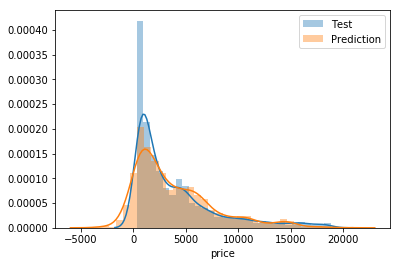

In [40]:
sns.distplot(y_test, label="Test")
sns.distplot(y_pred, label="Prediction")
plt.legend()

### Probamos el modelo
Creamos la funcion prob_model(), la cual recibira el modelo ya entrenado y un index (entregado mediante un input) el cual hara la prueba con el dataset de pruebas (X_test, y_test) y revisaremos la prediccion contra el real.

In [41]:
def prob_model(trained_model, index):
    pred = trained_model.predict(X_test.iloc[index].values.reshape(1, -1))
    real = y_test.iloc[index]
    print("Prediccion: " + str(pred[0]) +
          "\nReal: " + str(real))

In [42]:
prob_model(model, 123)#int(input()))

Prediccion: 1020.7619525794626
Real: 716


## Regresión polinomial

### Regresión polinomial simple
Probaremos la regresión polinomial con solo una variable para ver su comparación con la regresión lineal.

In [43]:
from sklearn.preprocessing import PolynomialFeatures

In [44]:
IF_data = IF_data.sort_values(by='carat')
IF_data.head()

,carat,price
48322,0.23,536
47643,0.23,530
31610,0.23,369
48323,0.23,536
37924,0.23,485


In [45]:
X = IF_data['carat'].values.reshape(-1, 1)
y = IF_data['price'].values.reshape(-1, 1)

In [46]:
pol_model = PolynomialFeatures(degree = 4)

In [47]:
X_poly = pol_model.fit_transform(X)
pol_model.fit(X_poly, y)

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)

In [48]:
lin_model = LinearRegression()
lin_model.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

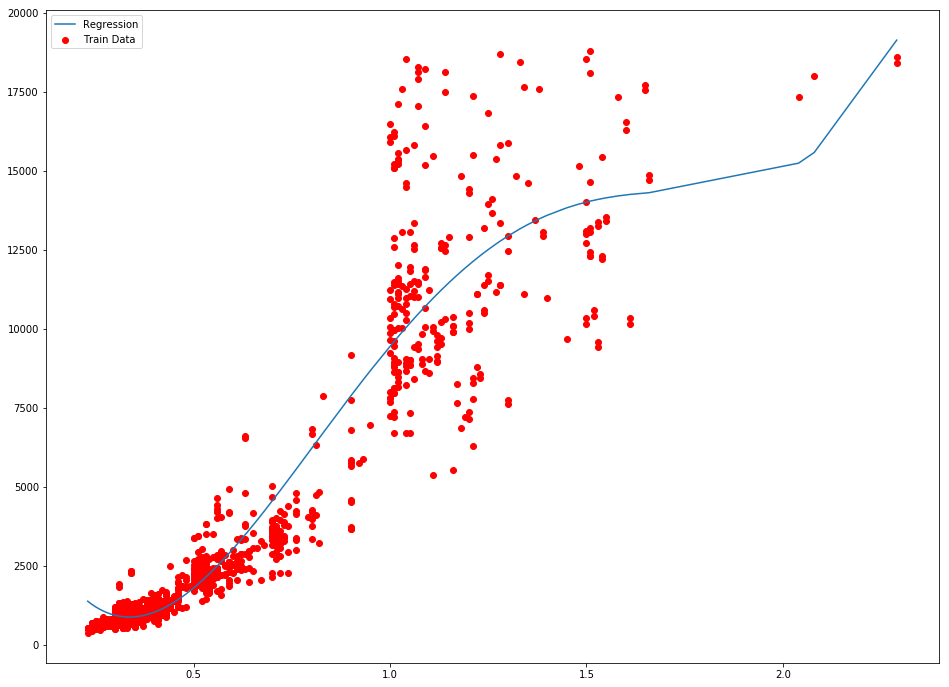

In [49]:
plt.figure(figsize=(16,12))
plt.scatter(X, y, color='red', label="Train Data")
plt.plot(X, lin_model.predict(pol_model.fit_transform(X)), label="Regression")
plt.legend()
plt.show()

In [50]:
lin_model.score(pol_model.fit_transform(X),y)

0.8958048578673183

In [51]:
def poly_reg(data, deg):
    data = data.sort_values(by='carat')
    data.head()
    X = data['carat'].values.reshape(-1, 1)
    y = data['price'].values.reshape(-1, 1)
    pol_model = PolynomialFeatures(degree = deg)
    X_poly = pol_model.fit_transform(X)
    pol_model.fit(X_poly, y)
    lin_model = LinearRegression()
    lin_model.fit(X_poly, y)
    plt.figure()#figsize=(16,12))
    plt.scatter(X, y, color='red', label="Train Data")
    plt.plot(X, lin_model.predict(pol_model.fit_transform(X)), label="Regression")
    plt.legend()
    plt.show()
    print("Score: " + str(lin_model.score(pol_model.fit_transform(X),y)))

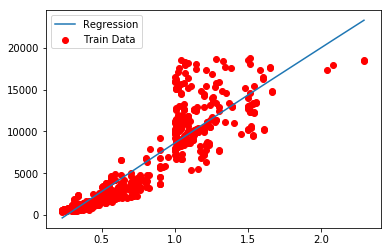

Score: 0.8639586919682136


In [52]:
poly_reg(IF_data,2)

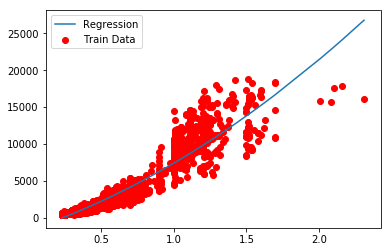

Score: 0.892177557329739


In [53]:
poly_reg(VVS1_data,2)

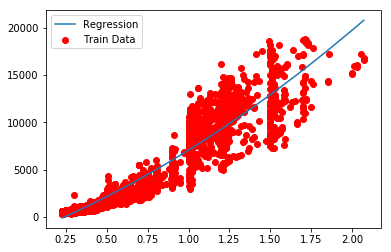

Score: 0.9044980894388294


In [54]:
poly_reg(VVS2_data,2)

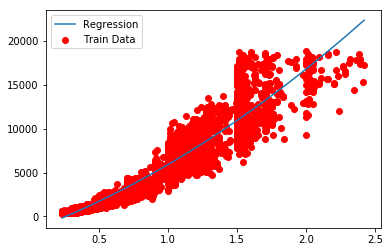

Score: 0.9101824013357265


In [55]:
poly_reg(VS1_data,2)

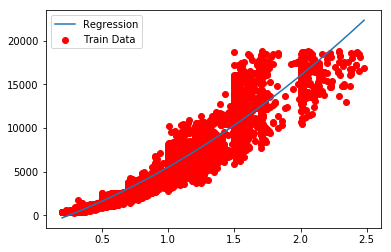

Score: 0.9180841673804043


In [56]:
poly_reg(VS2_data,2)

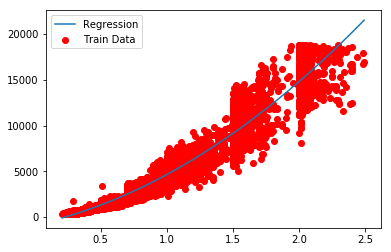

Score: 0.941136528037755


In [57]:
poly_reg(SI1_data,2)

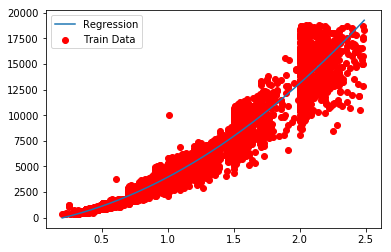

Score: 0.9352003788150649


In [58]:
poly_reg(SI2_data,2)

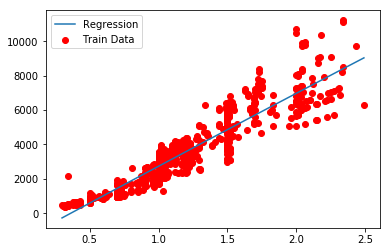

Score: 0.8553350614143285


In [59]:
poly_reg(I1_data,2)

### Regresion Polinomial Múltiple

In [60]:
X = dataComplete.drop('price', axis = 1)
y = dataComplete['price']

In [61]:
pol_model = PolynomialFeatures(degree = 2)
X_poly = pol_model.fit_transform(X)
pol_model.fit(X_poly, y)
lin_model = LinearRegression()
lin_model.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [62]:
lin_model.score(pol_model.fit_transform(X),y)

0.9719011802440582

## Regresión SVR
Requiere feature scaling

In [63]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [64]:
X = IF_data['carat'].values.reshape(-1, 1)
y = IF_data['price'].values.reshape(-1, 1)

In [65]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

c:\python3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\python3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [66]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

c:\python3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

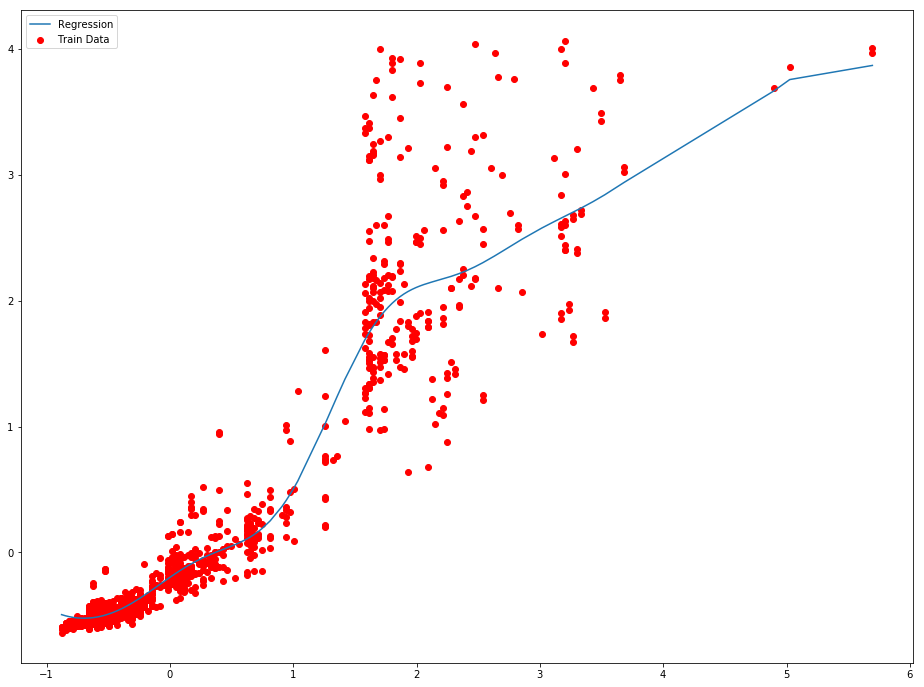

In [67]:
plt.figure(figsize=(16,12))
plt.scatter(X, y, color='red', label="Train Data")
plt.plot(X,regressor.predict(X), label="Regression")
plt.legend()
plt.show()

In [68]:
sc_y.inverse_transform(np.array(regressor.predict(sc_X.transform(2.5))))

array([14435.53729126])

In [69]:
regressor.score(X,y)

0.9070245491670901

### Decision Tree

In [70]:
from sklearn.tree import DecisionTreeRegressor

In [71]:
X = IF_data['carat'].values.reshape(-1, 1)
y = IF_data['price'].values.reshape(-1, 1)

In [72]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

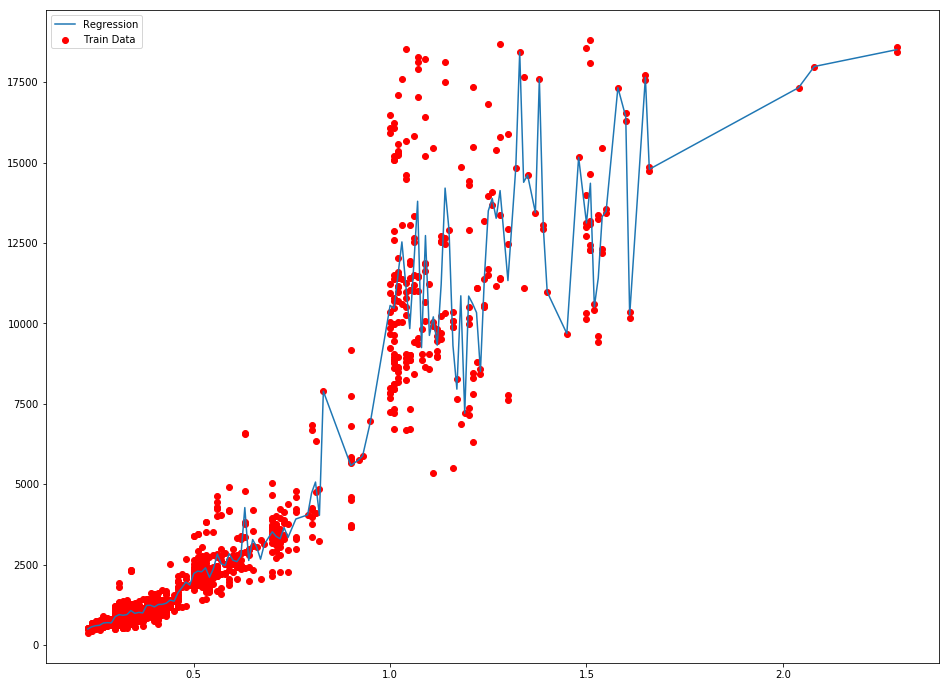

In [73]:
plt.figure(figsize=(16,12))
plt.scatter(X, y, color='red', label="Train Data")
plt.plot(X,regressor.predict(X), label="Regression")
plt.legend()
plt.show()

In [74]:
regressor.predict(1)

array([10557.86666667])

In [75]:
regressor.score(X,y)

0.9364059049294778

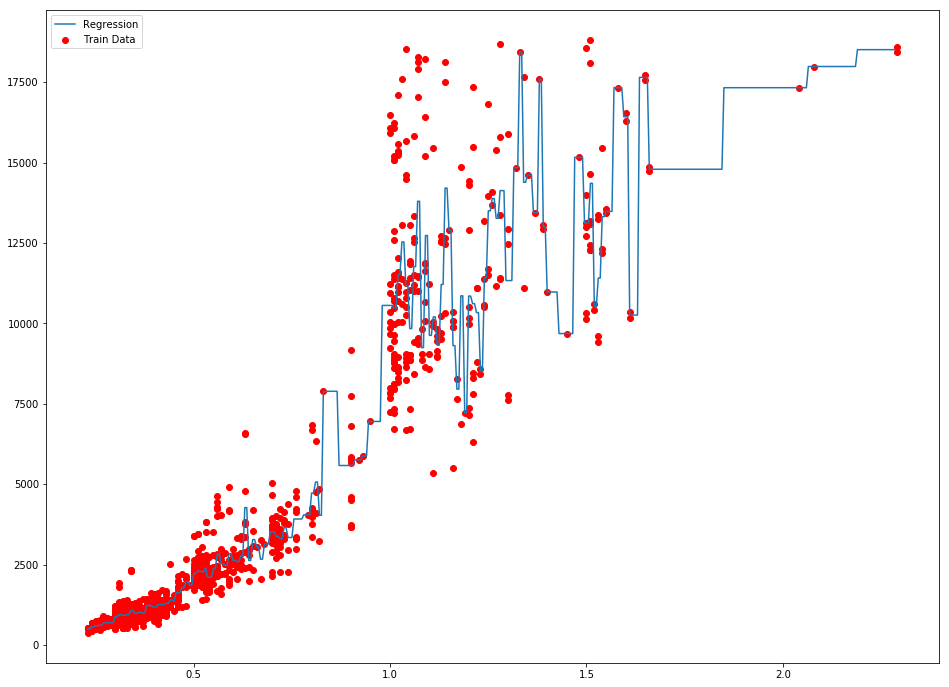

In [82]:
plt.figure(figsize=(16,12))
X_grid = np.arange(min(X), max(X),0.005)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(X, y, color='red', label="Train Data")
plt.plot(X_grid,regressor.predict(X_grid), label="Regression")
plt.legend()
plt.show()

### Random Forest

In [83]:
from sklearn.ensemble import RandomForestRegressor

In [84]:
X = IF_data['carat'].values.reshape(-1, 1)
y = IF_data['price'].values.reshape(-1, 1)

In [98]:
regressor = RandomForestRegressor(n_estimators = 300, random_state=0)
regressor.fit(X,y)

c:\python3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

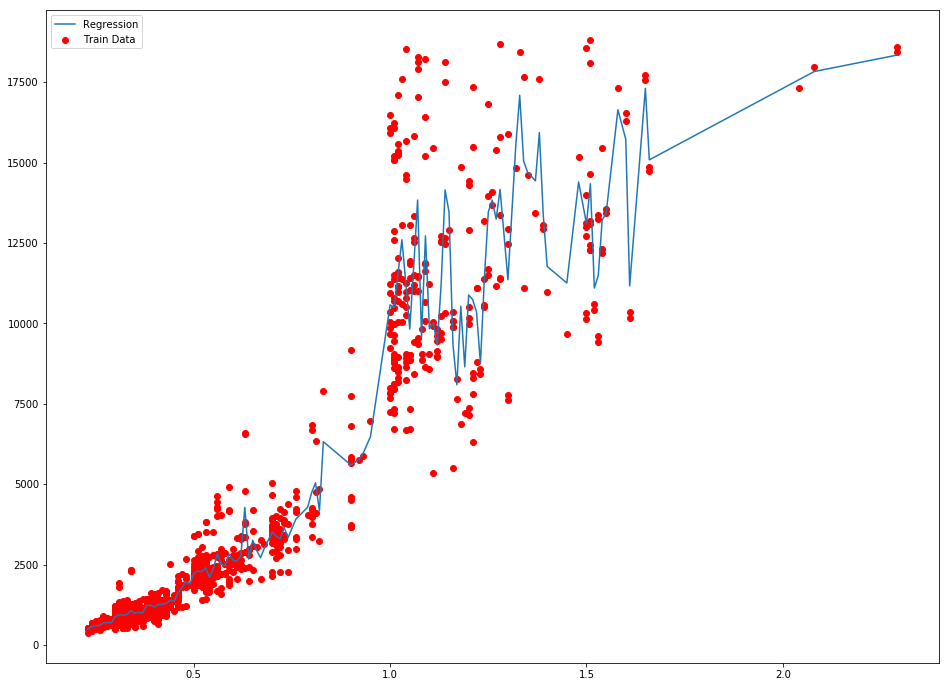

In [99]:
plt.figure(figsize=(16,12))
plt.scatter(X, y, color='red', label="Train Data")
plt.plot(X,regressor.predict(X), label="Regression")
plt.legend()
plt.show()

In [100]:
regressor.predict(1)

array([10577.30301873])

In [101]:
regressor.score(X,y)

0.9356135516691574

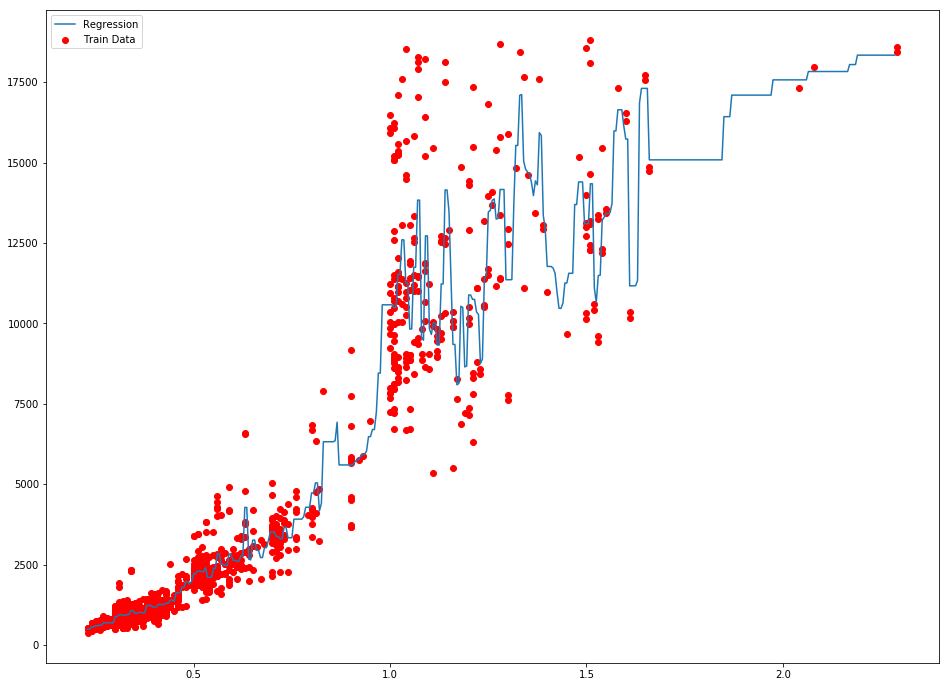

In [104]:
plt.figure(figsize=(16,12))
X_grid = np.arange(min(X), max(X),0.005)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(X, y, color='red', label="Train Data")
plt.plot(X_grid,regressor.predict(X_grid), label="Regression")
plt.legend()
plt.show()